<a href="https://colab.research.google.com/github/pi-qi/imdb_movie_review/blob/main/IMDB_code_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import all necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import skew
from scipy.stats import normaltest
from scipy.stats import shapiro

### Import Data using pandas
* method: read_csv

In [ ]:
imdb = pd.read_csv('data/IMDB-Movie-Data.csv')

### Primary Inspection
Display the dataset; first 5 rows

In [ ]:
imdb.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Shape of the DataFream

In [ ]:
imdb.shape

(1000, 12)

### Data type of the DataFream

In [ ]:
imdb.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

#### More info about the DataFream

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Data Cleaning

## Outliers

### Handeling Outliers by Imputing the data

#### Box Plot
* Identifing Outliers using Box Plot

### Revenue

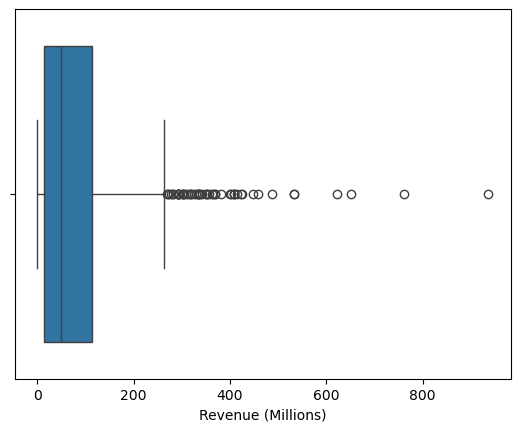

In [ ]:
sns.boxplot(x=imdb['Revenue (Millions)']);

In [ ]:
# view outliers columns
len(imdb[imdb['Revenue (Millions)'] > 350]) # 26

26

* update the outlier values with the maximum value average
* We will take the average of max 75% of the revenue value and impute the outliers with that value

In [ ]:
max_rev = imdb[imdb['Revenue (Millions)'] > 350]['Revenue (Millions)'].mean().round(2)
max_rev

460.59

In [ ]:
imdb['Revenue (Millions)'] = np.where(imdb['Revenue (Millions)'] > 500, max_rev, imdb['Revenue (Millions)'])

In [ ]:
imdb['Revenue (Millions)'].mean().round(2)

81.0

In [ ]:
imdb['Revenue (Millions)'].std()

95.42547021360271

* Befor imputing the outliers of the "Revenue" column the mean and Std was 82.96 and 103.30
* After imputing the outliers of the "Revenue" column the mean and Std is 74 and 91.33

### Outliers: 'Rating'
* Outliers in left side
* We will use the same technique for the 'Rating' column

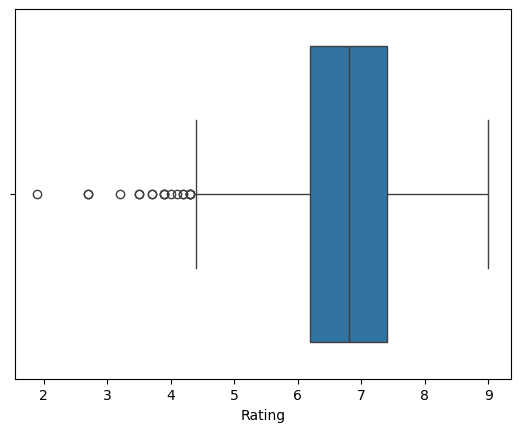

In [ ]:
sns.boxplot(x=imdb['Rating']);

In [ ]:
len(imdb[imdb['Rating'] < 4])

11

##### 11 Movies has outliers in 'Rating' column with less than 4 rating

In [ ]:
min_review = imdb[imdb['Rating'] < 4]['Rating'].mean().round(2)
min_review

3.33

In [ ]:
imdb['Rating']=np.where(imdb['Rating'] < 4, min_review, imdb['Rating'])

In [ ]:
imdb['Rating'].mean().round(2)

6.72

In [ ]:
imdb['Rating'].std()

0.9431149096652175

* The mean and Std 'Rating' before and after imputing the outliers is 6.72 and 0.94

### Outliers: 'Votes'

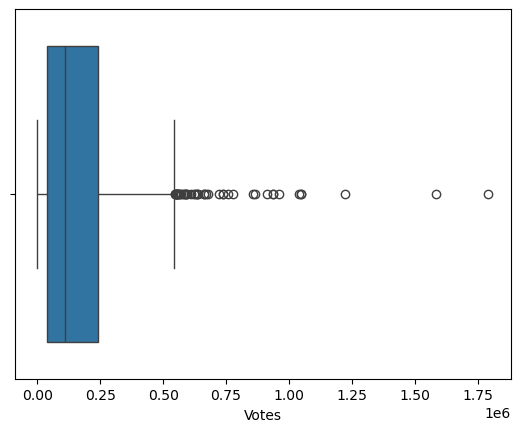

In [ ]:
sns.boxplot(x=imdb['Votes']);

In [ ]:
len(imdb[imdb['Votes'] > 800000])

12

Using max mean to adjust the outliers will make the data set more unstable. So, for 'Votes' column we will use a round-up number based on the data displayed in the box plot.
* For this cace we will take 800000 as the round-up number; as we noticed in the box plot there is only three values greater than 800000

In [ ]:
max_vote = imdb[imdb['Votes'] > 650000]['Votes'].mean().round(2)
max_vote

933023.76

In [ ]:
imdb['Votes'] = np.where(imdb['Votes'] > 800000, max_vote, imdb['Votes'])

In [ ]:
imdb['Votes'].mean().round(2)

167808.13

In [ ]:
imdb['Votes'].std()

176851.00417962493

* The mean 'Votes' before and after imputing the outliers is 169808 and 167808
* The Std 'Votes' before and after imputing the outliers is 188762 and 176851

## Looking for Null or Missing Value

In [ ]:
imdb.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

* The Revenue and Metascore columns has missing values

# Handeling Missing Values

### Revenue missing Data
* Checking correlation between Revenue and other columns

In [ ]:
numeric_columns = imdb.select_dtypes(include=['number'])
revenue_corr = numeric_columns.corr()['Revenue (Millions)'].sort_values(ascending=False).round(2)
revenue_corr

Revenue (Millions)    1.00
Votes                 0.65
Runtime (Minutes)     0.27
Rating                0.22
Metascore             0.14
Year                 -0.14
Rank                 -0.27
Name: Revenue (Millions), dtype: float64

### 'Revenue (Millions)' columns has moderate positive correlation with Votes column
* Votes column has zero missing values, so we can use the 'Voters' column to calculate the missing value for Revenue column
* Simple Linear Regression to handel the missing value

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into rows with and without missing values
known_data = imdb[imdb['Revenue (Millions)'].notnull()]
missing_data = imdb[imdb['Revenue (Millions)'].isnull()]

In [ ]:
# Train a linear regression model
X_train = known_data[['Votes']]
y_train = known_data['Revenue (Millions)']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict missing values
X_missing = missing_data[['Votes']]
missing_data.loc[:, 'Revenue (Millions)'] = model.predict(X_missing)

# Combine the datasets
imdb = pd.concat([known_data, missing_data]).sort_index()

In [ ]:
imdb['Revenue (Millions)'].mean()

74.26532771372902

In [ ]:
imdb['Revenue (Millions)'].std()

91.33885374396134

* After imputing the missing value of the "Revenue" column the mean and Std is 74.26 and 91.33

### Metascore Missing Data

In [ ]:
met_corr = numeric_columns.corr()['Metascore'].sort_values(ascending=False).round(2)
met_corr

Metascore             1.00
Rating                0.63
Votes                 0.33
Runtime (Minutes)     0.21
Revenue (Millions)    0.14
Year                 -0.08
Rank                 -0.19
Name: Metascore, dtype: float64

### Metascore columns has moderate positive correlation with Rating
* Rating has zero missing values, so we can use the 'Rating' to calculate the missing value for Metascore
* Simple Linear Regression to handel the missing value

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Initialize the imputer
imputer = IterativeImputer(max_iter=12, random_state=0)

In [ ]:
# Fit and transform the relevant columns
imputed_values = imputer.fit_transform(imdb[['Metascore', 'Rating', 'Votes']])

# Create a new DataFrame from the imputed values
imdb[['Metascore', 'Rating', 'Votes']] = imputed_values

In [ ]:
imdb['Metascore'].mean().round(2)

58.92

In [ ]:
imdb['Metascore'].std()

16.92496202154145

## We imputed all the missing value
* After Imputing the missing value in 'Revenue' column the mean is 74.27
* After Imputing the missing value in 'Metascore' column the mean is 58.92

In [ ]:
imdb.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

## Finding Duplicate rows

In [ ]:
imdb.duplicated().sum()

0

Data Frame has no duplicated rows

## Saving the cleaned imdb data fream
* Saved it in local computer
* Later imported in SQL database

In [ ]:
imdb.to_csv(r'Q:/UB_L/Fall/Data/imdb_data.csv', index=False)

# SQL Database Design and Querying

In [ ]:
import sqlite3
from sqlalchemy import create_engine

### Create or connect to SQL database

In [ ]:
df = pd.read_csv('Q:/UB_L/Fall/Data/imdb_data.csv')

In [ ]:
conn = sqlite3.connect('df.db')
cursor = conn.cursor()
# Create or connect to an SQLite database
engine = create_engine('sqlite:///df.db')

# Save the DataFrame to the SQL database
df.to_sql('imdb_table', con=engine, if_exists='replace', index=False)

1000

### View the SQL DataFrame

In [ ]:
query = "SELECT * FROM imdb_table"
dfi = pd.read_sql(query, con=engine)
dfi.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074.0,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820.0,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606.0,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545.0,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727.0,325.02,40.0


## Creating a Relational Database

In [ ]:
# Drop tables (if it exists) and then create again
cursor.execute('DROP TABLE IF EXISTS movies')
cursor.execute('DROP TABLE IF EXISTS genres')
cursor.execute('DROP TABLE IF EXISTS actors')


cursor.execute('''
CREATE TABLE IF NOT EXISTS movies (
    movie_id INTEGER PRIMARY KEY,
    rank INTEGER,
    title TEXT,
    director TEXT,
    year INTEGER,
    runtime_minutes INTEGER,
    rating REAL,
    votes INTEGER,
    revenue REAL,
    metascore INTEGER
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS genres (
    genre_id INTEGER PRIMARY KEY,
    genre TEXT
);
''')

# Create the movies_genres table
cursor.execute('''
CREATE TABLE IF NOT EXISTS movies_genres (
    movie_id INTEGER,
    genre_id INTEGER,
    FOREIGN KEY (movie_id) REFERENCES movies(movie_id),
    FOREIGN KEY (genre_id) REFERENCES genres(genre_id)
);
''')

# Create the actors table
cursor.execute('''
CREATE TABLE IF NOT EXISTS actors (
    actor_id INTEGER PRIMARY KEY,
    actor TEXT
);
''')

# Create the movies_actors table
cursor.execute('''
CREATE TABLE IF NOT EXISTS movies_actors (
    movie_id INTEGER,
    actor_id INTEGER,
    FOREIGN KEY (movie_id) REFERENCES movies(movie_id),
    FOREIGN KEY (actor_id) REFERENCES actors(actor_id)
);
''')

conn.commit()

## Inserting Data into Tables

### 'movies' table

In [ ]:
for index, movie in dfi.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO movies (rank, title, director, year, runtime_minutes, rating, votes, revenue, metascore)
        VALUES (?,?, ?, ?, ?, ?, ?, ?, ?)
    ''', (movie['Rank'], movie['Title'], movie['Director'], movie['Year'], movie['Runtime (Minutes)'], movie['Rating'],
          movie['Votes'], movie['Revenue (Millions)'], movie['Metascore']))
conn.commit()

# View in DataFrame
cursor.execute("SELECT * FROM movies;")
data = cursor.fetchall()

# Define column names (matching the table schema)
columns = ['movie_id', 'rank', 'title', 'director', 'year', 'runtime_minutes',
           'rating', 'votes', 'revenue', 'metascore']

# Convert the fetched data into a DataFrame
df_sql = pd.DataFrame(data, columns=columns)

### 'genres' and 'movies_genres' table

In [ ]:
# Extract movies and their genres from the raw source
for index, movie in dfi.iterrows():
    cursor.execute('''
    SELECT movie_id FROM movies WHERE title = ? AND director = ?
    ''', (movie['Title'], movie['Director'])) # Multiple movie could have same 'Title'
    movie_id = cursor.fetchone()[0]

    # Split genres into a list
    genres = movie['Genre'].split(',')

    # Insert movie-genre links into the `movies_genres` table
    for genre in genres:
        genre = genre.strip()  # Remove leading/trailing spaces

        # Fetch the genre_id for the genre
        cursor.execute('''
        SELECT genre_id FROM genres WHERE genre = ?
        ''', (genre,))
        genre_id = cursor.fetchone()

        # If the genre exists, insert the mapping into `movies_genres`
        if genre_id:
            genre_id = genre_id[0]
            cursor.execute('''
            INSERT INTO movies_genres (movie_id, genre_id)
            VALUES (?, ?)
            ''', (movie_id, genre_id))
conn.commit()

### 'actors' and 'movies_actors' table

In [ ]:
for index, movie in dfi.iterrows():
    cursor.execute('''
    SELECT movie_id FROM movies WHERE title = ? AND director = ?
    ''', (movie['Title'], movie['Director']))
    movie_id = cursor.fetchone()[0]

    actors = movie['Actors'].split(',')

    for actor in actors:
        actor = actor.strip()

        cursor.execute('''
        SELECT actor_id FROM actors WHERE actor = ?
        ''', (actor,))
        actor_id = cursor.fetchone()

        if actor_id:
            actor_id = actor_id[0]
            cursor.execute('''
            INSERT INTO movies_actors (movie_id, actor_id)
            VALUES (?, ?)
            ''', (movie_id, actor_id))
conn.commit()

## SQL queries
* Checking the newly created sql database

In [ ]:
# Query the list of tables
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

tables

[('movies_genres',),
 ('movies_actors',),
 ('imdb_table',),
 ('movies',),
 ('genres',),
 ('actors',)]

In [ ]:
df_sql.head(5)

,movie_id,rank,title,director,year,runtime_minutes,rating,votes,revenue,metascore
0,1,1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074.0,333.13,76.0
1,2,2,Prometheus,Ridley Scott,2012,124,7.0,485820.0,126.46,65.0
2,3,3,Split,M. Night Shyamalan,2016,117,7.3,157606.0,138.12,62.0
3,4,4,Sing,Christophe Lourdelet,2016,108,7.2,60545.0,270.32,59.0
4,5,5,Suicide Squad,David Ayer,2016,123,6.2,393727.0,325.02,40.0


In [ ]:
actors_data = cursor.execute("SELECT * FROM actors;").fetchone()

# Define column names for the actors table
columns = ['actor_id', 'actor']

# Convert the fetched data into a DataFrame
actors_sql = pd.DataFrame(actors_data, columns=columns)
actors_sql.head()

,actor_id,actor


* Same actors have multiple entries and multiple actor_id
* Here we solve that issue

In [ ]:
# Identify duplicate actors and keep the first occurrence
dup = actors_sql.drop_duplicates(subset=['actor'], keep='first')

# Create a reverse mapping of actor_id -> actor
reverse_mapping = actors_sql.set_index('actor_id')['actor'].to_dict()

# Create a mapping of old actor_ids to the new unique actor_ids
mapping = pd.Series(dup['actor_id'].values, index=dup['actor']).to_dict()

# Update movies_actors table to replace duplicate actor_ids with the unique actor_id
cursor.execute("SELECT * FROM movies_actors;")
movie_act_sql = pd.read_sql_query("SELECT * FROM movies_actors;", conn)

# Replace actor_id in movies_actors using the mapping
movie_act_sql['actor_id'] = movie_act_sql['actor_id'].map(
    lambda aid: mapping.get(reverse_mapping.get(aid, None), aid))

# Clear the old actors table and insert only unique actors
cursor.execute("DELETE FROM actors;")
dup.to_sql('actors', conn, if_exists='append', index=False)

# Replace movies_actors table with cleaned data
cursor.execute("DELETE FROM movies_actors;")
movie_act_sql.to_sql('movies_actors', conn, if_exists='append', index=False)

conn.commit()

In [ ]:
genres_data = cursor.execute("SELECT * FROM genres;").fetchall()

# Define column names for the actors table
column = ['genre_id', 'genre']

# Convert the fetched data into a DataFrame
genre_sql = pd.DataFrame(genres_data, columns=column)
genre_sql

,genre_id,genre


* Same genre have multiple entries and multiple genre_id
* This proble also similar to same actors with multiple entries
*
Here we solve that issue

In [ ]:
# Identify duplicate genres and keep the first occurrence
dupg = genre_sql.drop_duplicates(subset=['genre'], keep='first')

# Create a reverse mapping of genre_id -> genre
reverse_mappings = genre_sql.set_index('genre_id')['genre'].to_dict()

# Create a mapping of old genre_ids to the new unique genre_id
mappings = pd.Series(dupg['genre_id'].values, index=dupg['genre']).to_dict()

# Update movies_genre table to replace duplicate genre_ids with the unique genre_id
cursor.execute("SELECT * FROM movies_genres;")
movie_gen_sql = pd.read_sql_query("SELECT * FROM movies_genres;", conn)

# Replace actor_id in movies_genres using the mapping
movie_gen_sql['genre_id'] = movie_gen_sql['genre_id'].map(
    lambda aid: mappings.get(reverse_mappings.get(aid, None), aid))

# Clear the old genres table and insert only unique genre
cursor.execute("DELETE FROM genres;")
dupg.to_sql('genres', conn, if_exists='append', index=False)

# Replace movies_genres table with cleaned data
cursor.execute("DELETE FROM movies_genres;")
movie_gen_sql.to_sql('movies_genres', conn, if_exists='append', index=False)

conn.commit()

* No multiple entries for same genres

## movies_genres Table

In [ ]:
movie_gen_data = cursor.execute("SELECT * FROM movies_genres;").fetchall()

gen_col = ['movie_id', 'genre_id']

# Convert the fetched data into a DataFrame
mov_gen_sql = pd.DataFrame(movie_gen_data, columns=gen_col)
mov_gen_sql.head(15)

,movie_id,genre_id
0,1,1
1,1,2
2,1,3
3,2,2
4,2,5
5,2,3
6,3,7
7,3,8
8,4,9
9,4,10


* Counting Genres for each movie

In [ ]:
gen_count = cursor.execute('''
    SELECT movie_id, COUNT(genre_id) AS genre_count
    FROM movies_genres
    GROUP BY movie_id
    ORDER BY genre_count DESC
''').fetchall()

call = ['movie_id', 'genre_count']
movies_gen_count = pd.DataFrame(gen_count, columns=call)
movies_gen_count.head(15)

,movie_id,genre_count
0,240,6
1,1000,3
2,998,3
3,996,3
4,994,3
5,993,3
6,992,3
7,991,3
8,990,3
9,986,3


In [ ]:
duplicates = cursor.execute('''
    SELECT movie_id, genre_id, COUNT(*)
    FROM movies_genres
    GROUP BY movie_id, genre_id
    HAVING COUNT(*) > 1
''').fetchall()
duplicates

[]

* This table have some duplicated values
* Here we remove those duplicated values

In [ ]:
cursor.execute('''
    DELETE FROM movies_genres
    WHERE rowid NOT IN (
        SELECT MIN(rowid)
        FROM movies_genres
        GROUP BY movie_id, genre_id)
''')
conn.commit()

In [ ]:
duplicates # No Duplicated value

[]

## 'movies_actors' Table

In [ ]:
movie_act_data = cursor.execute("SELECT * FROM movies_actors;").fetchall()

act_col = ['movie_id', 'actor_id']

# Convert the fetched data into a DataFrame
mov_act_sql = pd.DataFrame(movie_act_data, columns= act_col)
mov_act_sql.head(15)

,movie_id,actor_id
0,1,1
1,1,2
2,1,3
3,1,4
4,2,5
5,2,6
6,2,7
7,2,8
8,3,9
9,3,10


In [ ]:
actor_count = cursor.execute('''
    SELECT movie_id, COUNT(DISTINCT actor_id) AS actor_count
    FROM movies_actors
    GROUP BY movie_id
    ORDER BY actor_count DESC
''').fetchall()

call = ['movie_id', 'actor_count']
movies_act_count = pd.DataFrame(actor_count, columns=call)
movies_act_count.head(15)

,movie_id,actor_count
0,1000,1986
1,1,1516
2,240,13
3,999,9
4,998,9
5,997,9
6,996,9
7,995,9
8,994,9
9,993,9


In [ ]:
duplicate_actors = cursor.execute('''
    SELECT movie_id, actor_id, COUNT(*)
    FROM movies_actors
    GROUP BY movie_id, actor_id
    HAVING COUNT(*) > 1
''').fetchall()
duplicate_actors

[]

* This table have some duplicated values (Similar to the previous table)
* Here we remove those duplicated values

In [ ]:
cursor.execute('''
    DELETE FROM movies_actors
    WHERE rowid NOT IN (
        SELECT MIN(rowid)
        FROM movies_actors
        GROUP BY movie_id, actor_id);
''')
conn.commit()

* movies_genres table = mov_gen_sql
* movies_actors table = mov_act_sql
* genres table = genre_sql
* actors table = actors_sql
* movies table = df_sql
* imdb_table = dfi

#  Exploratory Data Analysis (EDA)

In [ ]:
from collections import Counter
import re
import itertools

In [ ]:
dfi.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074.0,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820.0,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606.0,138.12,62.0


## Pair plot of the Dataset

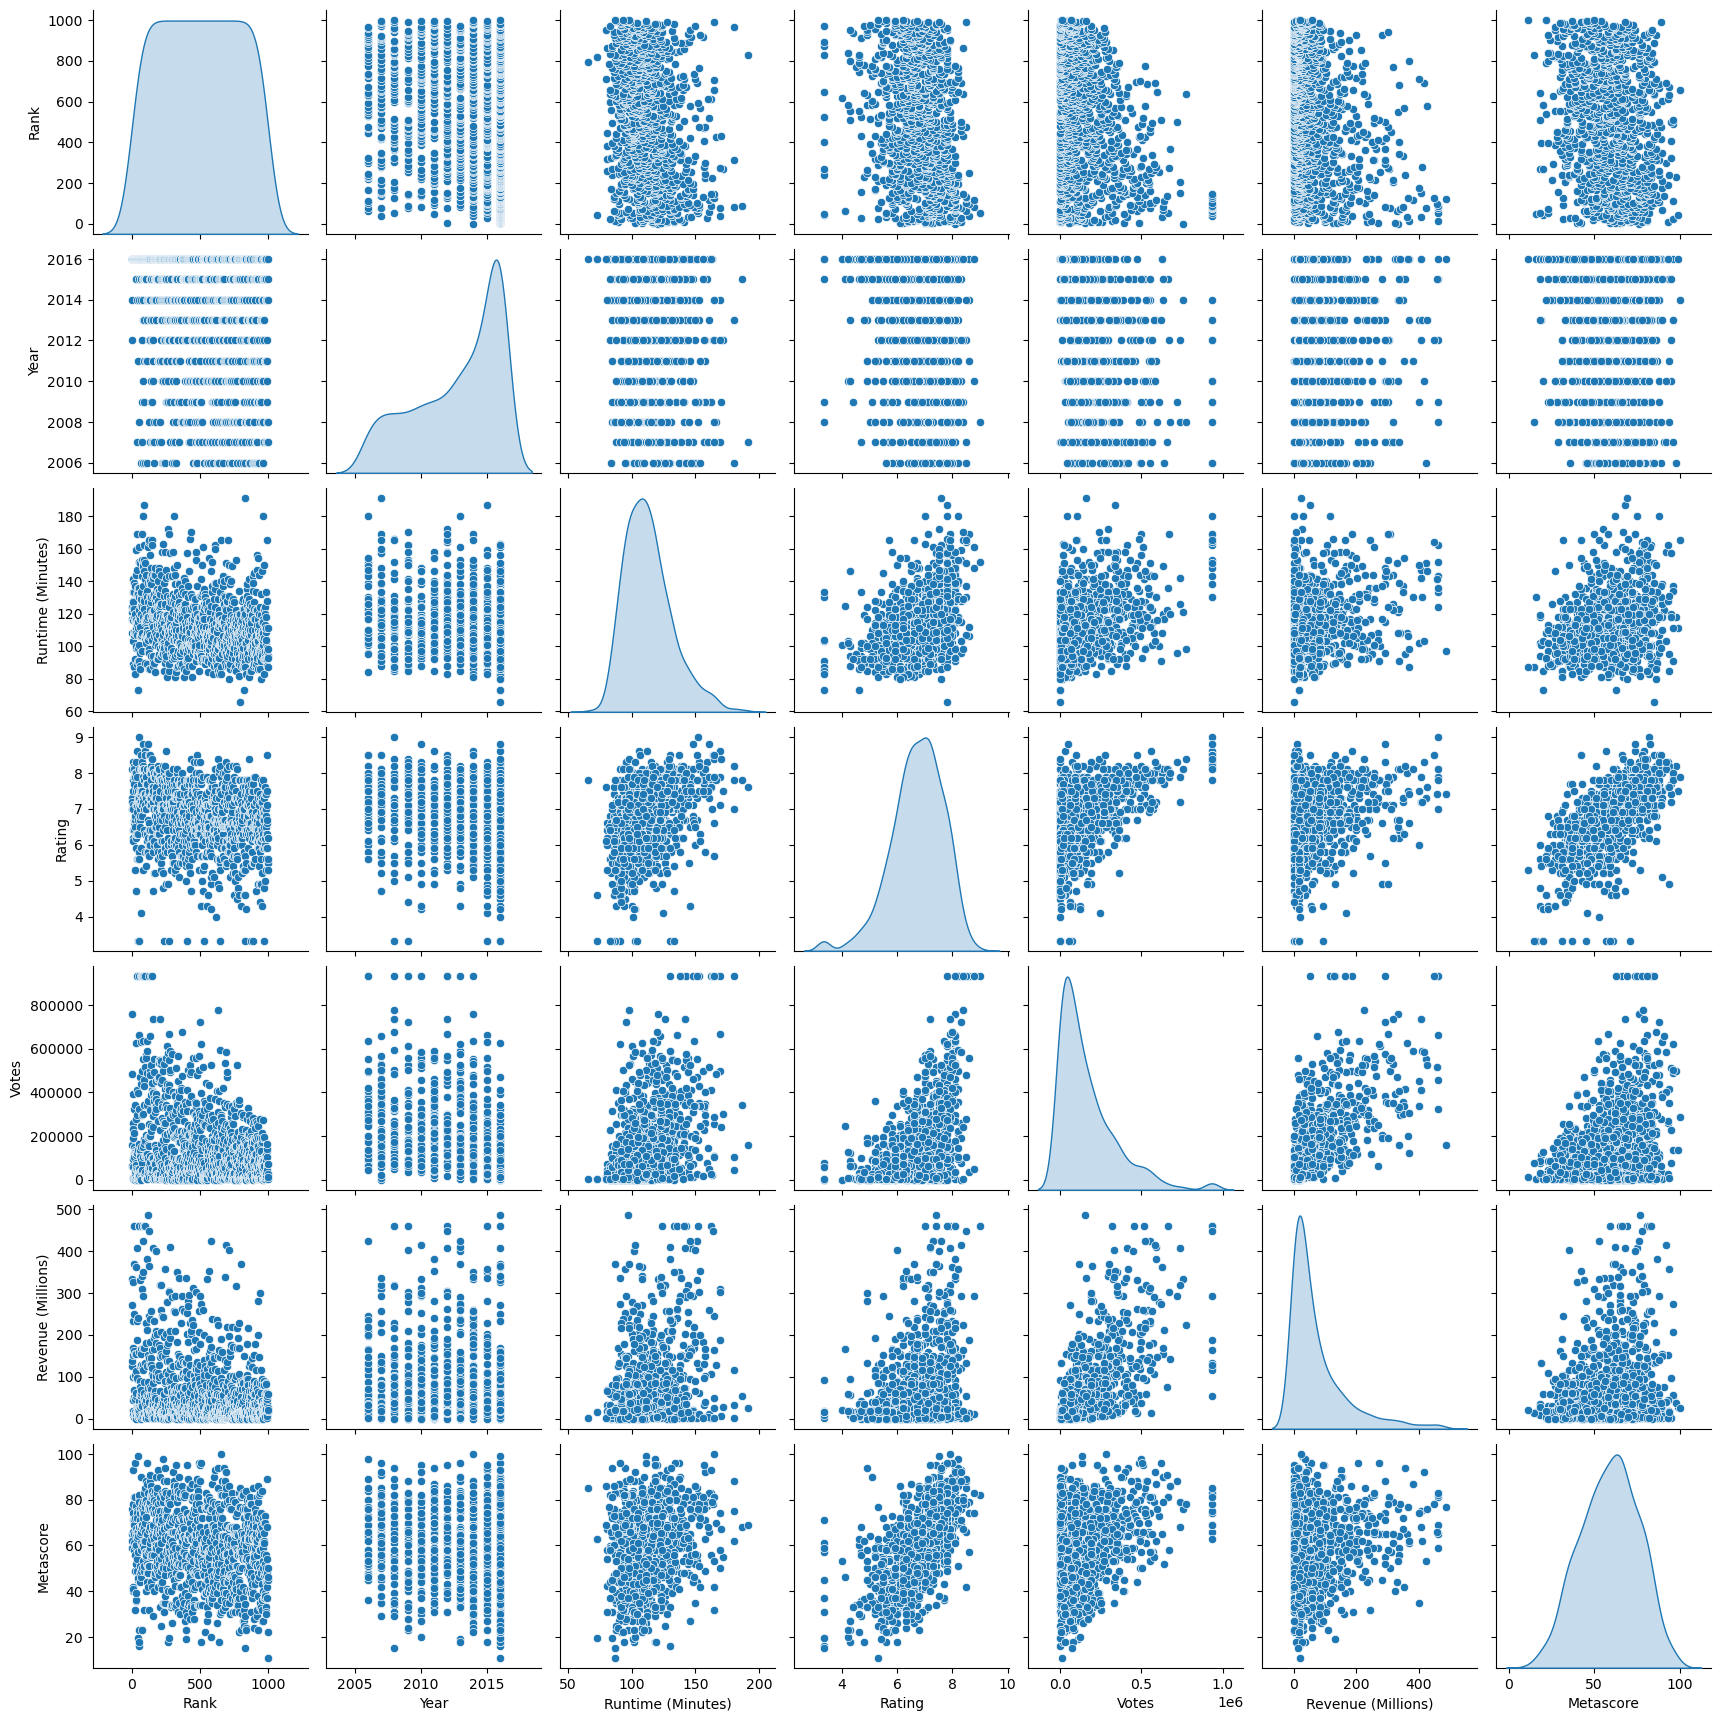

In [ ]:
sns.pairplot(dfi, diag_kind='kde');

* This will make easy for initial or visual interpretation the dataset

## Genre Analysis
* Showing Which Movie Genre generates Revenue
* Showing Which Movie Genre is most popular by 'Rating'
* Most Common movie genres

### Most Common Movie Genre

In [ ]:
dfic = dfi.copy()
dfic['Genre'] = dfic['Genre'].str.split(',')
exploded_genre = dfic.explode('Genre')

# Split on commas with optional spaces using regex
dfic['Actors'] = dfic['Actors'].str.split(r',\s*')
exploded_actors = dfic.explode('Actors')

genres_count = exploded_genre['Genre'].value_counts()
genres_count

Genre
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: count, dtype: int64

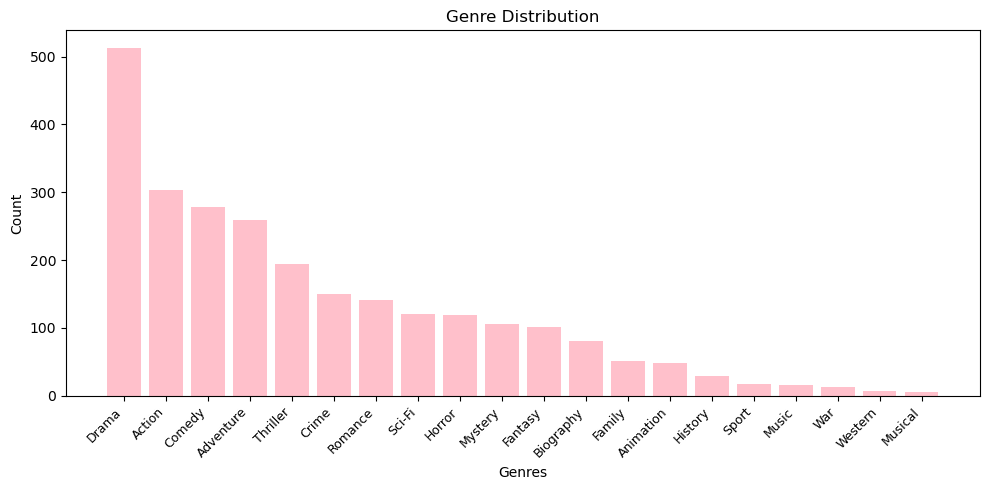

In [ ]:
genres = genres_count.index
counts = genres_count.values

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='pink')

plt.title('Genre Distribution', fontsize=12)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()

* Drama is the most common movie genre
* War, Western, Musical is the least common

### Movie Genres with highest rating

In [ ]:
genre_rating = (exploded_genre.groupby('Genre')[['Revenue (Millions)', 'Rating']]
    .mean().sort_values(by='Rating', ascending=False))
genre_rating

,Revenue (Millions),Rating
Genre,,
War,46.457949,7.353846
Animation,184.127346,7.324490
Biography,53.222650,7.283086
History,50.970640,7.127586
Music,46.056678,7.075000
Sport,59.615659,7.011111
Drama,46.272955,6.950526
Musical,81.642000,6.940000
Mystery,50.471842,6.886792


## Visualising the Movie Genres with highest rating

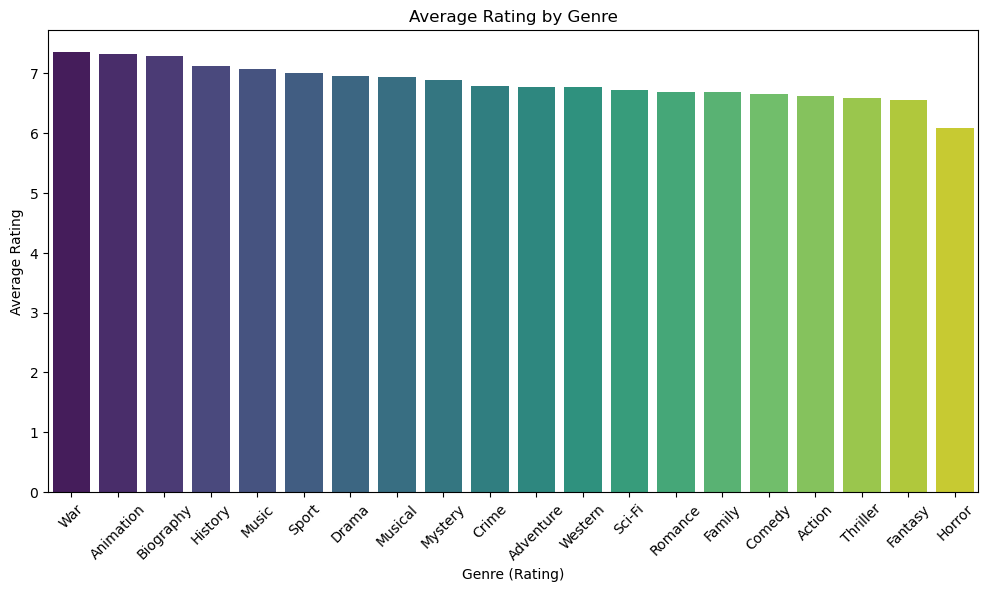

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_rating.index, y=genre_rating['Rating'], hue=genre_rating.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre (Rating)")
plt.show()

* War, Animation, Biography genre has highest rating
* Horror genre has lowest rating

## Movie Genres with Most Revenue

In [ ]:
genre_rev = exploded_genre.groupby('Genre')[['Revenue (Millions)', 'Rating']].mean().sort_values(by='Revenue (Millions)', ascending=False)
genre_rev

,Revenue (Millions),Rating
Genre,,
Animation,184.127346,7.324490
Adventure,146.628153,6.774633
Sci-Fi,124.566464,6.716667
Family,123.916631,6.684314
Fantasy,115.934643,6.556040
Action,115.441480,6.614158
Western,86.668414,6.771429
Musical,81.642000,6.940000
Comedy,71.265279,6.652796


## Visualising the Movie Genres with Most Revenue

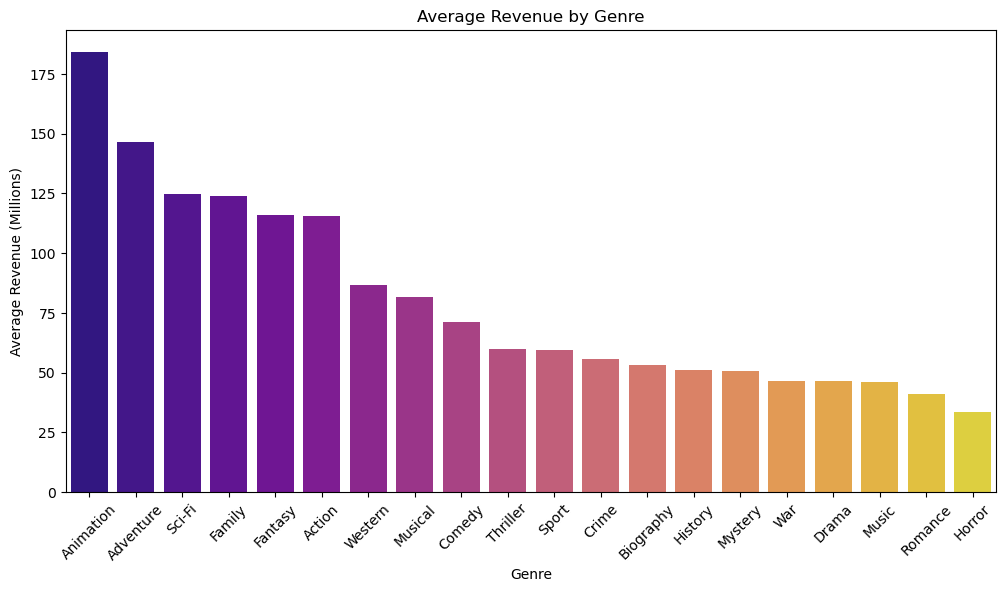

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_rev.index, y=genre_rev['Revenue (Millions)'], hue=genre_rev.index, palette='plasma', legend=False)
plt.xticks(rotation=45)
plt.title("Average Revenue by Genre")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Genre")
plt.show()

* Commecial success for Animation movies genre is much higher than any other genres
* Horror, Romantic, Music, Drama, and war genres has lower revenue than other genres
* Horror movie is performing bad in both case, Rating and Revenue

## Actors Analysis

### Actors involves in most average Revenue generating movies
* This data shows actors involvement with commercially successfull moviee

## Most Popular Actors

In [ ]:
exploded_actors['Actors'] = explo_actors['Actors'].str.split(', ')

actor_counts = explo_actors['Actors'].explode().value_counts()

Actors
Mark Wahlberg         15
Hugh Jackman          14
Christian Bale        13
Brad Pitt             13
Channing Tatum        12
Tom Hardy             12
Anne Hathaway         12
Johnny Depp           12
Michael Fassbender    12
Robert Downey Jr.     12
Name: count, dtype: int64

In [ ]:
actor_df = actor_counts.reset_index()
actor_df.columns = ['Actor', 'Count']
actor_df.head(10)

,Actor,Count
0,Mark Wahlberg,15
1,Hugh Jackman,14
2,Christian Bale,13
3,Brad Pitt,13
4,Channing Tatum,12
5,Tom Hardy,12
6,Anne Hathaway,12
7,Johnny Depp,12
8,Michael Fassbender,12
9,Robert Downey Jr.,12


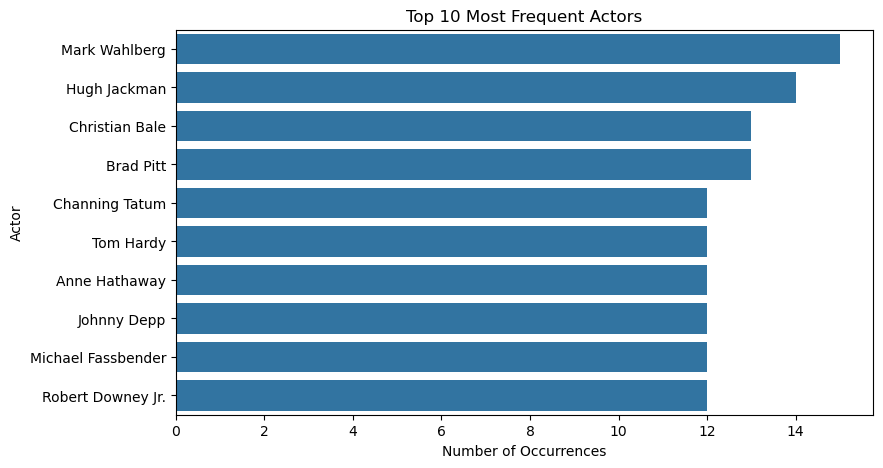

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(x='Count', y='Actor', data=actor_df.head(10));

plt.xlabel('Number of Occurrences')
plt.ylabel('Actor')
plt.title('Top 10 Most Frequent Actors')
plt.show()

In [ ]:
actor_rev = (exploded_actors.groupby('Actors')[['Revenue (Millions)', 'Rating']]
             .mean().sort_values(by='Revenue (Millions)', ascending=False).head(10))
actor_rev

,Revenue (Millions),Rating
Actors,,
Kaitlin Olson,486.29,7.4
Ellen DeGeneres,486.29,7.4
Ed O'Neill,486.29,7.4
Alan Tudyk,460.59,7.9
Daisy Ridley,460.59,8.1
Donnie Yen,460.59,7.9
John Boyega,460.59,8.1
Ned Beatty,414.98,8.3
Joan Cusack,414.98,8.3


## Visualising the Actors with highest average revenue generating movie

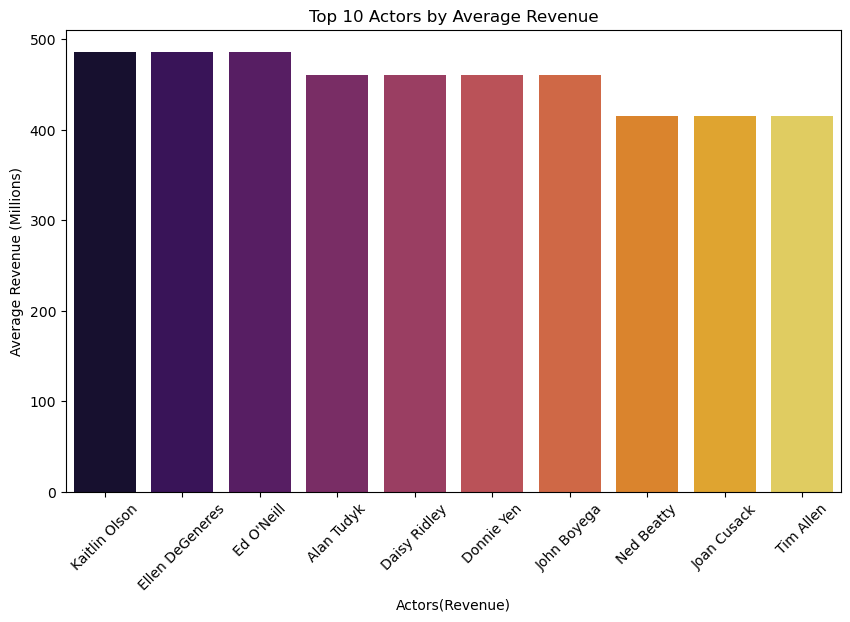

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=actor_rev.index, y=actor_rev['Revenue (Millions)'], hue=actor_rev.index, palette='inferno', legend=False)

plt.xticks(rotation=45)

plt.title("Top 10 Actors by Average Revenue")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Actors(Revenue)")

plt.show()

## Actors involves in highest average Rating movies

In [ ]:
actor_rating = exploded_actors.groupby('Actors')[['Revenue (Millions)', 'Rating']].mean().sort_values(by='Rating', ascending=False).head(15)
actor_rating

,Revenue (Millions),Rating
Actors,,
Sakshi Tanwar,11.15,8.8
Sanya Malhotra,11.15,8.8
Fatima Sana Shaikh,11.15,8.8
Audrey Fleurot,13.18,8.6
Mackenzie Foy,187.99,8.6
Ryô Narita,4.68,8.6
Ryûnosuke Kamiki,4.68,8.6
François Cluzet,13.18,8.6
Anne Le Ny,13.18,8.6


### Visualising the Actors involves in highest average Rating movies

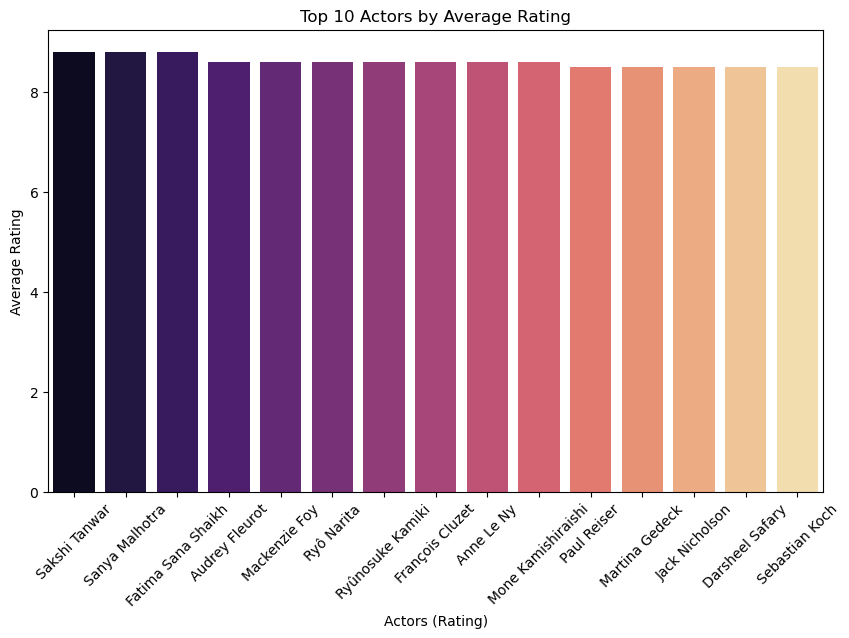

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=actor_rating.index, y=actor_rating['Rating'], hue=actor_rating.index, palette='magma', legend=False)

plt.xticks(rotation=45)

plt.title("Top 10 Actors by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Actors (Rating)")

plt.show()

## Relation b/w higher rating and revenue

### Visulizing the histogram of Ratings

Text(0, 0.5, 'Movies')

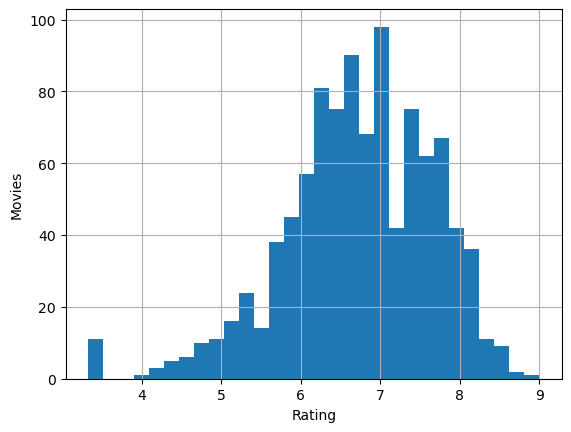

In [ ]:
rating_hist = dfi["Rating"].hist(bins=30);
rating_hist.set_xlabel("Rating")
rating_hist.set_ylabel("Movies")

### Most of the movies' ratings are between 6 - 8

### Visulizing the histogram of Revenue

Text(0, 0.5, 'Movies')

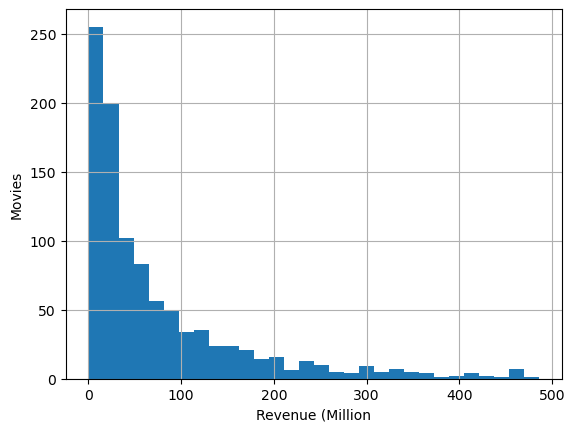

In [ ]:
revenue_hist = dfi["Revenue (Millions)"].hist(bins=30)
revenue_hist.set_xlabel("Revenue (Million")
revenue_hist.set_ylabel("Movies")

### Most of the movies have revenue in range(0-200) million dollars

### Zooming the range

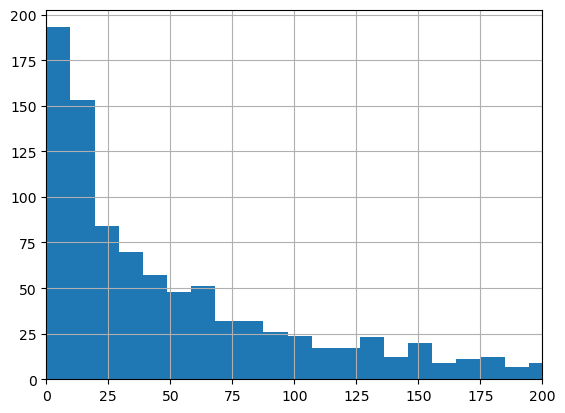

In [ ]:
rev_zoom = dfi["Revenue (Millions)"].hist(bins=50);
rev_zoom.set_xlim(0, 200);

#### Now, it is more clear that the revenue range for most of the movies is around 0 to 60 million dollars

# Relation between revenues and ratings?

* Regression line Rating and Revenue

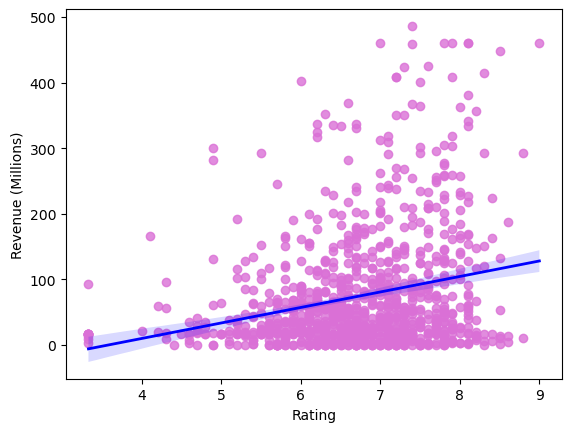

In [ ]:
sns.regplot(x="Rating", y="Revenue (Millions)", data=dfi, scatter_kws={"color": "orchid"}, line_kws={"color": "blue", "lw": 2});

### Calculating the correlation between Rating and Revenue

In [ ]:
rating_rev_corr = dfi['Rating'].corr(dfi['Revenue (Millions)'])
rating_rev_corr.round(2)

0.24

* Data suggest there is a very week correlation between rating and Revenue
* That means a movie can have good rating but not so commercially successful

## Top rated Movies & Directors

In [ ]:
top_rated = dfi.sort_values(["Rating","Metascore"], ascending=False)[
    ["Title", "Director", "Rating","Metascore"]]
top_rated.index = range(0,1000)
top_rated.head(n=15)

,Title,Director,Rating,Metascore
0,The Dark Knight,Christopher Nolan,9.0,82.000000
1,Dangal,Nitesh Tiwari,8.8,82.914737
2,Inception,Christopher Nolan,8.8,74.000000
3,Kimi no na wa,Makoto Shinkai,8.6,79.000000
4,Interstellar,Christopher Nolan,8.6,74.000000
5,The Intouchables,Olivier Nakache,8.6,57.000000
6,The Lives of Others,Florian Henckel von Donnersmarck,8.5,89.000000
7,Whiplash,Damien Chazelle,8.5,88.000000
8,The Departed,Martin Scorsese,8.5,85.000000
9,The Dark Knight Rises,Christopher Nolan,8.5,78.000000


### MultiIndex Dataframe

In [ ]:
top_rated.groupby("Director")[["Rating", "Metascore"]].agg(["mean", "median"]).sort_values(
    [("Rating", "mean"), ("Metascore", "mean")], ascending=False).head(n=15)

Rating         Metascore           
                                   mean median       mean     median
Director                                                            
Nitesh Tiwari                      8.80   8.80  82.914737  82.914737
Christopher Nolan                  8.68   8.60  74.800000  74.000000
Makoto Shinkai                     8.60   8.60  79.000000  79.000000
Olivier Nakache                    8.60   8.60  57.000000  57.000000
Florian Henckel von Donnersmarck   8.50   8.50  89.000000  89.000000
Aamir Khan                         8.50   8.50  42.000000  42.000000
Damien Chazelle                    8.40   8.40  90.500000  90.500000
Naoko Yamada                       8.40   8.40  80.000000  80.000000
Lee Unkrich                        8.30   8.30  92.000000  92.000000
S.S. Rajamouli                     8.30   8.30  77.137615  77.137615
Thomas Vinterberg                  8.30   8.30  76.000000  76.000000
Amber Tamblyn                      8.30   8.30  71.000000  71.000000
Rajkumar Hirani                    8.30   8.30  59.000000  59.000000
Pete Docter                        8.25   8.25  91.000000  91.000000
Lenny Abrahamson                   8.20   8.20  86.000000  86.000000

In [ ]:
top_20 = dfi['Director'].value_counts().head(20)
top_20

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Martin Scorsese       5
J.J. Abrams           5
Justin Lin            5
David Fincher         5
Antoine Fuqua         5
Christopher Nolan     5
Guillermo del Toro    4
Steven Spielberg      4
D.J. Caruso           4
Clint Eastwood        4
Name: count, dtype: int64

In [ ]:
dfi[dfi['Director'] == 'Nitesh Tiwari']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969.0,11.15,82.914737


#### Christopher Nolan is the best director in span of 2006 to 2016
* We choose 'Christopher Nolan' over Nitesh Tiwari, beacuse Christopher Nolan directed 5 movies where Nitesh Tiwari directed
* only one movie. When calculating mean of any verables large gives better accuracy.

## Revenue Vs Famous Movies

In [ ]:
top_rated_revenue = dfi.sort_values(["Rating","Metascore"], ascending=False)[
    ["Title", "Director", "Rating","Metascore", "Revenue (Millions)"]]
top_rated_revenue.index = range(0,1000)
top_rated_revenue.head(n=15)

,Title,Director,Rating,Metascore,Revenue (Millions)
0,The Dark Knight,Christopher Nolan,9.0,82.000000,460.590000
1,Dangal,Nitesh Tiwari,8.8,82.914737,11.150000
2,Inception,Christopher Nolan,8.8,74.000000,292.570000
3,Kimi no na wa,Makoto Shinkai,8.6,79.000000,4.680000
4,Interstellar,Christopher Nolan,8.6,74.000000,187.990000
5,The Intouchables,Olivier Nakache,8.6,57.000000,13.180000
6,The Lives of Others,Florian Henckel von Donnersmarck,8.5,89.000000,11.280000
7,Whiplash,Damien Chazelle,8.5,88.000000,13.090000
8,The Departed,Martin Scorsese,8.5,85.000000,132.370000
9,The Dark Knight Rises,Christopher Nolan,8.5,78.000000,448.130000


* It is not necessary that if the movie is famous, it will generate more revenue

## Votes Vs Metascore

In [ ]:
dfi[["Votes", "Metascore"]].corr()

,Votes,Metascore
Votes,1.000000,0.336844
Metascore,0.336844,1.000000


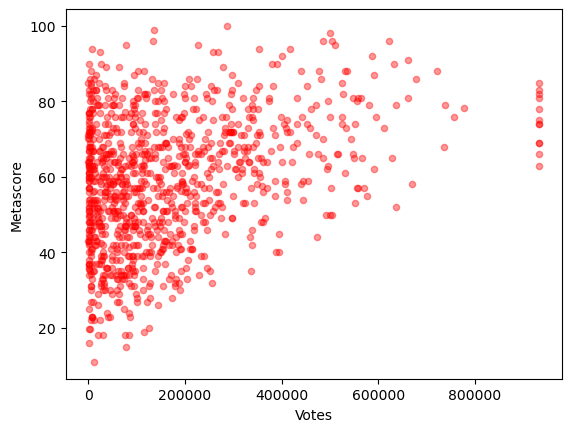

In [ ]:
dfi.plot(kind="scatter", x="Votes",y="Metascore", color="red", alpha=0.4,);

### Zooming to clustered area

(0.0, 650000.0)

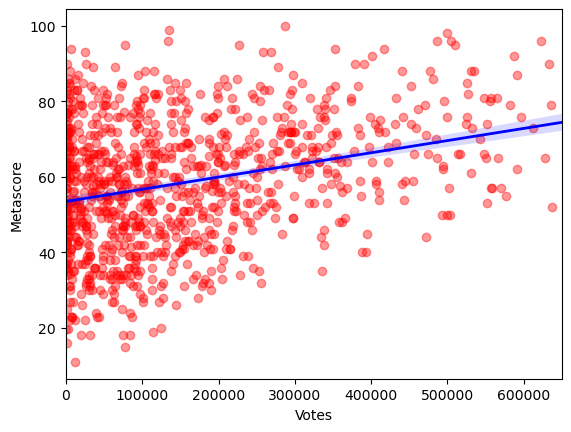

In [ ]:
sns.regplot(x="Votes", y="Metascore", data=dfi, scatter_kws={"color": "red",
            "alpha": 0.4}, line_kws={"color": "blue", "lw": 2});
plt.xlim(0, 650000)

* There is doesn't seem to be any major relation between number of votes and metascore.

## Votes Vs Rating

In [ ]:
dfi[["Votes", "Rating"]].corr()

,Votes,Rating
Votes,1.000000,0.523083
Rating,0.523083,1.000000


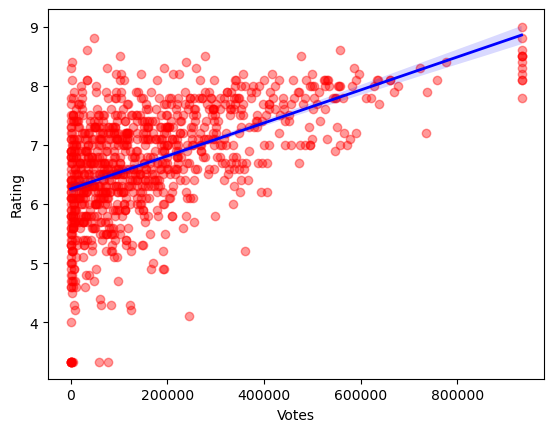

In [ ]:
sns.regplot(x="Votes", y="Rating", data=dfi, scatter_kws={"color": "red", "alpha": 0.4}, line_kws={"color": "blue", "lw": 2});

* Modarate correlation between Voted and Rating

## Number of movies each year

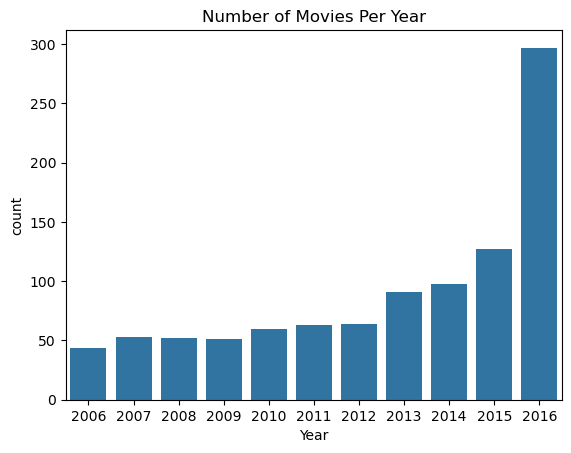

In [ ]:
sns.countplot(x='Year',data=dfi)
plt.title("Number of Movies Per Year");

* A significent growth in the number of movie released in 2016

## Average Votes

In [ ]:
ave_vote = dfi.groupby('Year')['Votes'].mean()

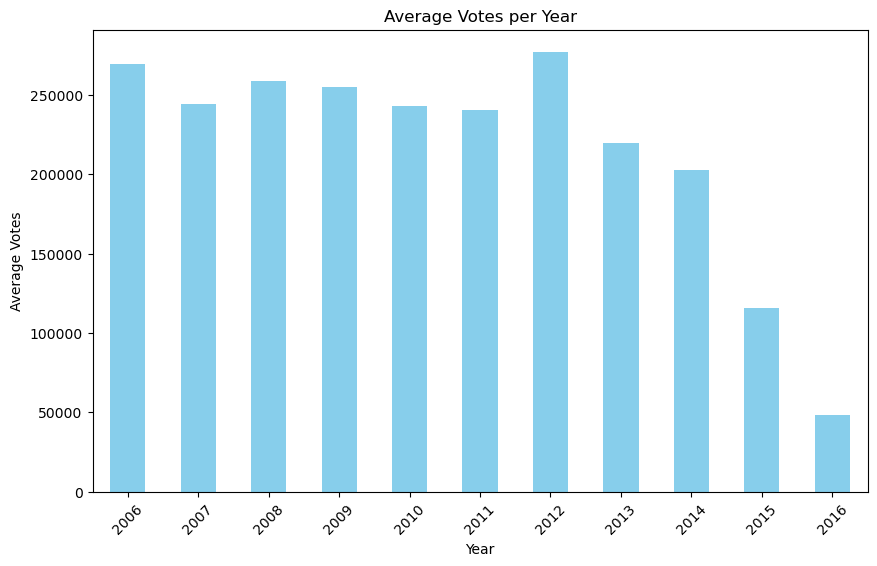

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ave_vote.plot(kind='bar', color='skyblue')


plt.title('Average Votes per Year')
plt.xlabel('Year')
plt.ylabel('Average Votes')

plt.xticks(rotation=45)
plt.show()

## Linear Regression to Find the Votes Trend in every Years

In [ ]:
import scipy.stats as stats
avg_votes_per_year = dfi.groupby('Year')['Votes'].mean().sort_values(ascending=False)

years = avg_votes_per_year.index.values
votes = avg_votes_per_year.values

slope, intercept, r_value, p_value, std_err = stats.linregress(years, votes)
slope.round(2)

-16592.32

* The result of the slope being -16592.32 indicates a downtrend in the yearly average votes.

## Average yearly rating of Movies

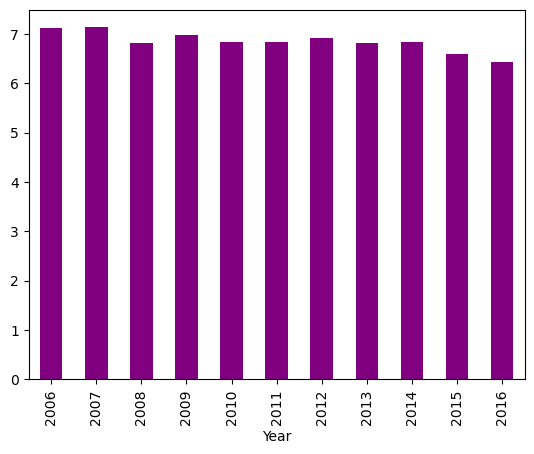

In [ ]:
ave_rating = dfi.groupby('Year')['Rating'].mean()
ave_rating.plot(kind='bar', color='purple');

## Find the Rating Trend

In [ ]:
years = ave_rating.index.values.reshape(-1, 1)
ratings = ave_rating.values

model = LinearRegression()

model.fit(years, ratings)

# Get the slope (coefficient) to determine the trend
slopes = model.coef_[0]
slopes.round(2)

-0.05

* The slope is negative (-0.05), it indicates a downtrend (5%) in the average rating.

## Average yearly revenue of Movies

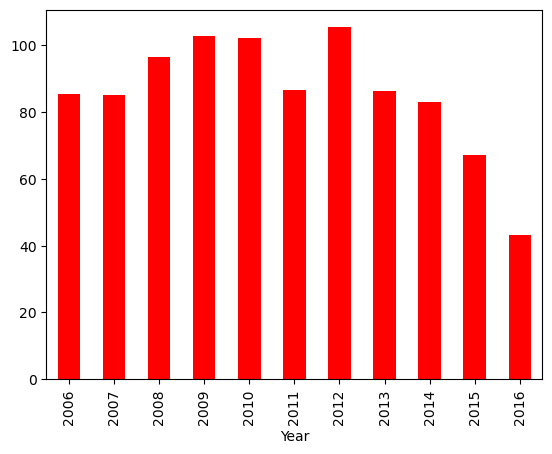

In [ ]:
ave_rev = dfi.groupby('Year')['Revenue (Millions)'].mean()
ave_rev.plot(kind='bar', color='red');

## Find the Revene Trend

In [ ]:
yrs = ave_rev.index.values.reshape(-1, 1)
revenue = ave_rev.values

model = LinearRegression()

model.fit(yrs, revenue)

# Get the slope (coefficient) to determine the trend
slopes = model.coef_[0]
slopes.round(2)

-3.21

* The slop is negative, is suggest a negative trends in average yearly revenue